In [2]:
#import magic command 

%matplotlib inline 

In [3]:
#import dependencies 

import pandas as pd 

import matplotlib.pyplot as plt

import numpy as np


In [4]:
#files to load and read

city_data_to_load = pd.read_csv("city_data.csv")

ride_data_to_load = pd.read_csv("ride_data.csv")

In [5]:
#read files to data frame 

city_data_df = pd.read_csv("city_data.csv")

ride_data_df = pd.read_csv("ride_data.csv")

In [6]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [7]:
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12


In [8]:
#inspect data for null values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [9]:
#inspect data to check data types 
ride_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   float64
dtypes: float64(2), object(2)
memory usage: 74.3+ KB


In [10]:
#inspect for null values
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [11]:
#inspect data types 
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [12]:
#get number of unique values for type of city 

city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [13]:
#get number of unique values for city 

city_data_df["city"].unique()

array(['Richardfort', 'Williamsstad', 'Port Angela', 'Rodneyfort',
       'West Robert', 'West Anthony', 'West Angela', 'Martinezhaven',
       'Karenberg', 'Barajasview', 'Robertport', 'Joneschester',
       'Leahton', 'West Christopherberg', 'Johnton', 'Reynoldsfurt',
       'Port David', 'New Kimberlyborough', 'Carriemouth', 'Rogerston',
       'Jerryton', 'Loganberg', 'Simpsonburgh', 'Port Frank',
       'South Latoya', 'West Samuelburgh', 'Grahamburgh',
       'West Patrickchester', 'North Madeline', 'South Jack', 'Liumouth',
       'West Ericstad', 'Royland', 'Erikaland', 'Huntermouth',
       'Justinberg', 'South Evanton', 'Lake Danielberg',
       'East Kaylahaven', 'West Heidi', 'Karenside', 'South Karenland',
       'West Gabriel', 'North Markport', 'Raymondhaven', 'North Barbara',
       'Lake Scottton', 'West Josephberg', 'Pattyland',
       'South Michelleport', 'Christopherfurt', 'Valentineton',
       'South Phillip', 'North Jason', 'Deanville', 'Lake Jonathanshire',
   

In [14]:
#get number of data points in each type of cities 

sum(city_data_df["type"]=="Urban")


66

In [15]:
sum(city_data_df["type"]=="Suburban")

36

In [16]:
sum(city_data_df["type"]=="Rural")

18

In [17]:
#merge data frames 

pyber_data_df = pd.merge(ride_data_df,city_data_df, how="left", on=["city","city"])

pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12,4,Rural


In [18]:
#create data frame for each type 

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

urban_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12,10,Urban
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11,44,Urban
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11,21,Urban
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12,4,Urban
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12,33,Urban


In [23]:
#create data frame for each type 

suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

suburban_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,1/27/2019 3:08,27.79,6.653620e+12,11,Suburban
1626,East Kentstad,4/7/2019 19:44,18.75,6.575960e+12,20,Suburban
1627,Lake Omar,1/17/2019 21:33,21.71,9.669120e+11,22,Suburban
1628,Myersshire,2/27/2019 17:38,17.10,5.706770e+12,19,Suburban
1629,West Hannah,4/19/2019 1:06,37.78,2.273050e+12,12,Suburban
1630,East Marymouth,3/29/2019 8:36,37.60,6.370860e+12,5,Suburban
1631,New Raymond,2/25/2019 21:40,20.44,5.984510e+12,17,Suburban
1632,Lake Robertside,1/11/2019 20:17,46.51,6.574330e+12,4,Suburban
1633,Josephside,3/30/2019 9:45,44.74,5.592690e+12,25,Suburban
1634,Brandonfort,1/14/2019 12:35,28.02,8.100260e+12,10,Suburban


In [24]:
#create data frame for each type 

rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

rural_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4.018030e+12,2,Rural
2255,Taylorhaven,4/6/2019 1:01,45.31,2.275360e+12,1,Rural
2256,Garzaport,2/18/2019 18:27,36.16,2.928340e+12,7,Rural
2257,New Ryantown,1/27/2019 17:33,42.68,7.994600e+12,2,Rural
2258,Lake Latoyabury,4/2/2019 21:00,13.46,8.232860e+12,2,Rural
2259,North Holly,2/16/2019 17:02,39.46,4.571480e+12,8,Rural


In [25]:
#get the number of rides for urban cities using groupby method 

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [26]:
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [53]:
#get ride count per city by rural cities 

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [28]:
#get mean fare for each city type 

urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]

urban_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [29]:
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [30]:
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [31]:
#get average number of drivers by each city type 

urban_avg_drivers = urban_cities_df.groupby(["city"]).mean()["driver_count"]

urban_avg_drivers.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [32]:
#get average number od drivers for each city type 

suburban_avg_drivers = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

suburban_avg_drivers.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [33]:
rural_avg_drivers = rural_cities_df.groupby(["city"]).mean()["driver_count"]

rural_avg_drivers.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

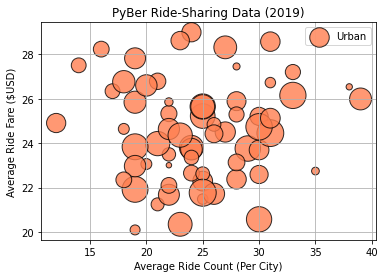

In [49]:
#create a scatter plot for urban cities 

#add label, change size by 10x, change color to coral, change edgecolor, linewidths, and transparancy
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            label="Urban", 
            s=10*urban_avg_drivers,
            c="coral",
            edgecolor="black",
            linewidths=1,
            alpha=0.8)

#add legend 
plt.legend()

#add labels / title 

plt.title("PyBer Ride-Sharing Data (2019)")

plt.xlabel("Average Ride Count (Per City)")

plt.ylabel("Average Ride Fare ($USD)")

#add grid 

plt.grid(True)






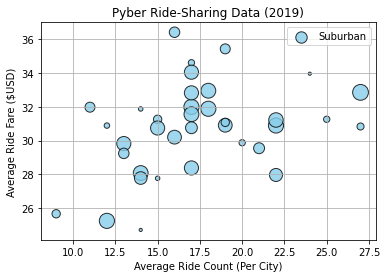

In [51]:
#create a suburban bubble chart 

plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10*suburban_avg_drivers,
            c= "skyblue", 
            edgecolor="black", 
            alpha=0.8,
            linewidths=1,
            label="Suburban")

plt.xlabel("Average Ride Count (Per City)")

plt.ylabel("Average Ride Fare ($USD)")

plt.title("Pyber Ride-Sharing Data (2019)")

plt.legend()

plt.grid(True)



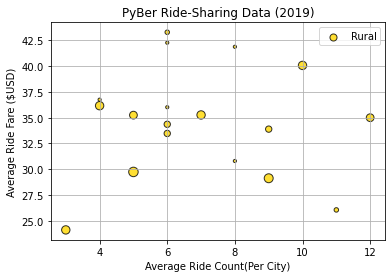

In [54]:
#create rural city bubble chart 

plt.scatter(rural_ride_count,
            rural_avg_fare,
            c="gold",
            s=10*rural_avg_drivers,
            linewidth=1,
            alpha=0.8,
            label="Rural",
            edgecolor="black")

#title/labels

plt.xlabel("Average Ride Count(Per City)")

plt.ylabel("Average Ride Fare ($USD)")

plt.title("PyBer Ride-Sharing Data (2019)")

#grid

plt.grid(True)

#legend
plt.legend()



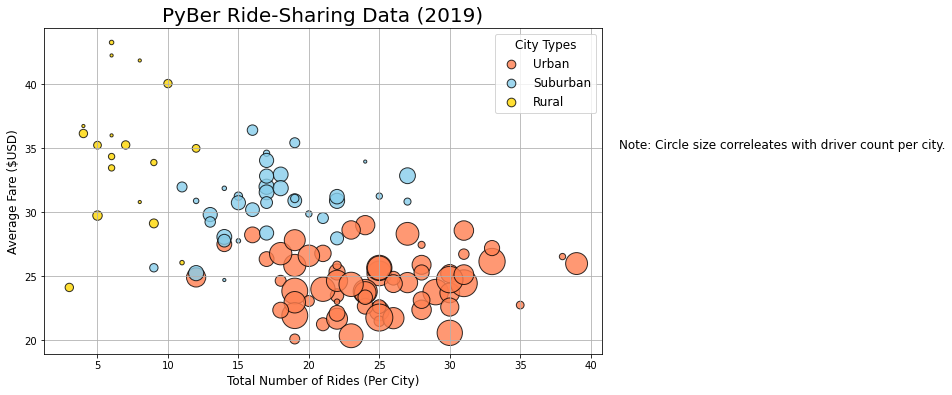

<Figure size 432x288 with 0 Axes>

In [71]:
#combine all of the scatter plots 


#increase size of axes and title 

plt.subplots(figsize=(10,6))

plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            label="Urban", 
            s=10*urban_avg_drivers,
            c="coral",
            edgecolor="black",
            linewidths=1,
            alpha=0.8)

plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10*suburban_avg_drivers,
            c= "skyblue", 
            edgecolor="black", 
            alpha=0.8,
            linewidths=1,
            label="Suburban")


plt.scatter(rural_ride_count,
            rural_avg_fare,
            c="gold",
            s=10*rural_avg_drivers,
            linewidth=1,
            alpha=0.8,
            label="Rural",
            edgecolor="black")


#incorporate other graph features 

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)

plt.xlabel("Total Number of Rides (Per City)", fontsize=12)

plt.ylabel("Average Fare ($USD)", fontsize=12)

plt.grid(True)

#create legend 

lgnd = plt.legend(fontsize="12", mode="Expanded",
                 scatterpoints=1, loc="best", title="City Types")

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#incorporate a label about the circle size 

plt.text(42,35, "Note: Circle size correleates with driver count per city.", fontsize=12)

plt.show()

#save figure 

plt.savefig("Rideshare.png")

In [72]:
#get summary statistics 

urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400240e+12,22.000000
50%,24.640000,4.711190e+12,37.000000
75%,34.580000,7.451580e+12,52.000000
max,44.970000,9.991540e+12,73.000000


In [73]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364250e+12,5.000000
50%,30.750000,5.053220e+12,16.000000
75%,39.830000,7.551670e+12,21.000000
max,49.960000,9.917740e+12,25.000000


In [74]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275360e+12,1.000000
50%,37.050000,4.023960e+12,4.000000
75%,47.070000,7.118050e+12,7.000000
max,58.550000,9.990580e+12,9.000000


In [75]:
#get info on ride count 

suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [76]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [77]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [78]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [79]:
round(urban_ride_count.median(),2)

24.0

In [80]:
#get mode for urban cities ride count 

urban_ride_count.mode()

0    22
1    25
dtype: int64

In [81]:
#get mode for suburban cities 

suburban_ride_count.mode()

0    17
dtype: int64

In [83]:
#import Numpy and the stats module from SciPy

import numpy as np

import scipy.stats as sts

In [87]:
mean_urban_ride_count = np.mean(urban_ride_count)

print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [89]:
#get mode for suburban cities using SciPy

mode_suburban_ride_count = sts.mode(suburban_ride_count)

print(mode_suburban_ride_count)

ModeResult(mode=array([17], dtype=int64), count=array([7]))


In [90]:
mode_rural_ride_count = sts.mode(rural_ride_count)

print(mode_rural_ride_count)

ModeResult(mode=array([6], dtype=int64), count=array([5]))


In [91]:
#get fare from the urban cities 

urban_fares = urban_cities_df["fare"]

urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [101]:
#calculate the neasures of central tendency for the average fare for urban cities 

mean_urban_fares = np.mean(urban_fares)

print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)

print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)

print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [93]:
suburban_fares = suburban_cities_df["fare"]

suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [95]:
suburban_fares_mean = np.mean(suburban_fares)

suburban_fares_mean

30.97012800000002

In [96]:
rural_fares = rural_cities_df["fare"]

In [97]:
rural_fares_mean = np.mean(rural_fares)

rural_fares_mean

34.623440000000016

In [98]:
#get the driver count data from the urban cities 

urban_drivers = urban_cities_df["driver_count"]

urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [102]:
#calculate mean, median, mode for urban drivers 

mean_urban_drivers = np.mean(urban_drivers)

print(f"The mean for urban drivers is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median for urban drivers is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)

print(f"The mode fare price for urban trips is {mode_urban_drivers}.")



The mean for urban drivers is 36.68.
The median for urban drivers is 37.00.
The mode fare price for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [103]:
#calculate mean, median, mode for suburban drivers 

suburban_drivers = suburban_cities_df["driver_count"]


In [104]:
mean_suburban_drivers = np.mean(suburban_drivers)

print(f"The mean for suburban drivers is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)

print(f"The median for suburban drivers is {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)

print(f"The mode for suburban drivers is {mode_suburban_drivers}.")



The mean for suburban drivers is 13.71.
The median for suburban drivers is 16.00.
The mode for suburban drivers is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [105]:
#calculate mean, median, mode for rural drivers 

rural_drivers = rural_cities_df["driver_count"]

In [106]:
mean_rural_drivers = np.mean(rural_drivers)

print(f"The mean for rural drivers is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)

print(f"The median for rural drivers is {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)

print(f"The mode for rural drivers is {mode_rural_drivers}.")


The mean for rural drivers is 4.30.
The median for rural drivers is 4.00.
The mode for rural drivers is ModeResult(mode=array([1], dtype=int64), count=array([32])).


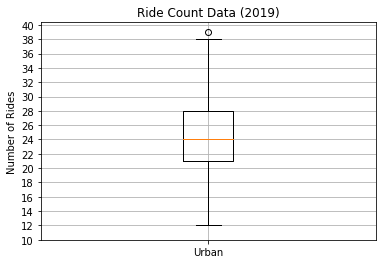

In [108]:
#create a box-and-whisker plot for urban city data ride count 

x_labels = ["Urban"]

fig,ax = plt.subplots()

ax.boxplot(urban_ride_count, labels=x_labels)

#add title, y-axis and grid

ax.set_title("Ride Count Data (2019)")

ax.set_ylabel("Number of Rides")

ax.set_yticks(np.arange(10,41, step=2.0))

ax.grid()

plt.show()

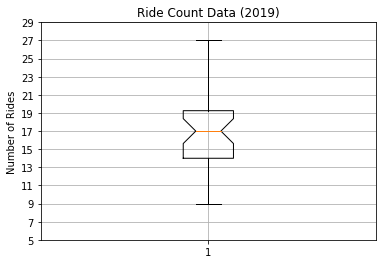

In [110]:
x_labels = "Suburban"

fig,ax = plt.subplots()

ax.boxplot(suburban_ride_count, x_labels)

ax.set_title("Ride Count Data (2019)")

ax.set_ylabel("Number of Rides")

ax.set_yticks(np.arange(5,30,step=2.0))

ax.grid()

plt.show()

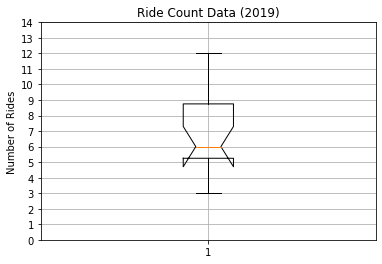

In [111]:
x_labels = "Rural"

fig,ax = plt.subplots()

ax.boxplot(rural_ride_count, x_labels)

ax.set_title("Ride Count Data (2019)")

ax.set_ylabel("Number of Rides")

ax.set_yticks(np.arange(0,15,step=1.0))

ax.grid()

plt.show()

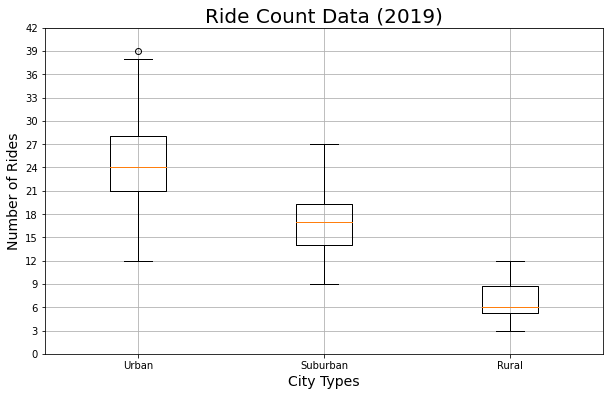

In [114]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]

ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Ride Count Data (2019)',fontsize=20)

ax.set_ylabel('Number of Rides',fontsize=14)

ax.set_xlabel("City Types",fontsize=14)

ax.boxplot(ride_count_data, labels=x_labels)

ax.set_yticks(np.arange(0, 45, step=3.0))

ax.grid()
# Save the figure.

plt.savefig("Box and Whisker Ride Data")

plt.show()

In [115]:
#figure out which city is the outlier 

urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]

print(f"{urban_city_outlier} has the highest rider count")


West Angela has the highest rider count


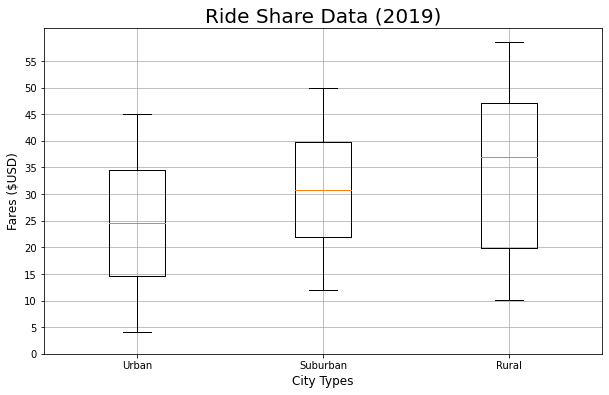

In [119]:
#create box and whisker containing all 3 city types for ride fare data 

x_labels = ["Urban", "Suburban", "Rural"]

ride_fare_data = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots(figsize=(10,6))

ax.set_title("Ride Share Data (2019)", fontsize=20)

ax.set_ylabel("Fares ($USD)", fontsize=12)

ax.set_xlabel("City Types", fontsize=12)

ax.boxplot(ride_fare_data, labels=x_labels)

ax.set_yticks(np.arange(0,60, step=5.0))

ax.grid()

plt.savefig("Box & Whisker Fare Ride Share")

plt.show()







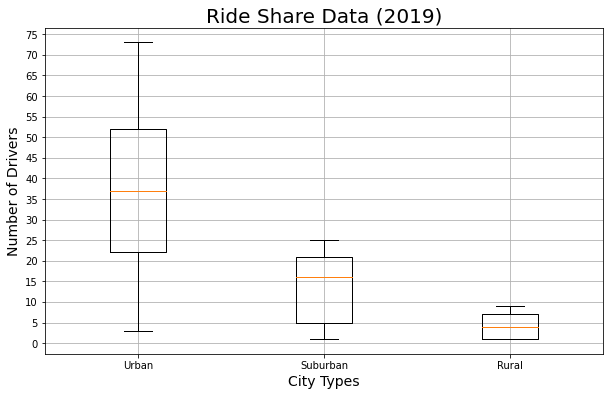

In [124]:
#box and whisker for driver count data 

x_labels = ["Urban", "Suburban", "Rural"]

driver_data = [urban_drivers, suburban_drivers, rural_drivers]

fig, ax = plt.subplots(figsize=(10,6))

ax.set_title("Ride Share Data (2019)", fontsize=20)

ax.set_ylabel("Number of Drivers", fontsize=14)

ax.set_xlabel("City Types", fontsize=14)

ax.boxplot(driver_data, labels=x_labels)

ax.set_yticks(np.arange(0,80, step=5.0))

ax.grid()

#plt.savefig("Box & Whisker Driver Data")

plt.show()